In [1]:
%matplotlib inline
from pathlib import Path

from scipy import stats
from sklearn.utils import resample

import matplotlib.pylab as plt

from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

# git codes

In [29]:
"""
echo "# Practical_Statistics_for_DataSciecne" >> README.md
git init
git add README.md
git commit -m "first commit"
git branch -M main
git remote add origin https://github.com/indhra/Practical_Statistics_for_DataSciecne.git
git push -u origin main
"""

'\necho "# Practical_Statistics_for_DataSciecne" >> README.md\ngit init\ngit add README.md\ngit commit -m "first commit"\ngit branch -M main\ngit remote add origin https://github.com/indhra/Practical_Statistics_for_DataSciecne.git\ngit push -u origin main\n'

In [2]:
try:
    import common 
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

In [3]:
Path().resolve()

WindowsPath('C:/Users/INDHRNA/Desktop/ML/practical_statistics_Python_BRUCE/Indhra-version')

In [4]:
LOANS_INCOME_CSV = DATA / 'loans_income.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'

In [5]:
np.random.seed(seed=1)

In [11]:
x=np.linspace(-50,50,50)
x

array([-50.        , -47.95918367, -45.91836735, -43.87755102,
       -41.83673469, -39.79591837, -37.75510204, -35.71428571,
       -33.67346939, -31.63265306, -29.59183673, -27.55102041,
       -25.51020408, -23.46938776, -21.42857143, -19.3877551 ,
       -17.34693878, -15.30612245, -13.26530612, -11.2244898 ,
        -9.18367347,  -7.14285714,  -5.10204082,  -3.06122449,
        -1.02040816,   1.02040816,   3.06122449,   5.10204082,
         7.14285714,   9.18367347,  11.2244898 ,  13.26530612,
        15.30612245,  17.34693878,  19.3877551 ,  21.42857143,
        23.46938776,  25.51020408,  27.55102041,  29.59183673,
        31.63265306,  33.67346939,  35.71428571,  37.75510204,
        39.79591837,  41.83673469,  43.87755102,  45.91836735,
        47.95918367,  50.        ])

In [10]:
xsample = stats.norm.rvs(size=1000)
xsample

array([ 1.62434536e+00, -6.11756414e-01, -5.28171752e-01, -1.07296862e+00,
        8.65407629e-01, -2.30153870e+00,  1.74481176e+00, -7.61206901e-01,
        3.19039096e-01, -2.49370375e-01,  1.46210794e+00, -2.06014071e+00,
       -3.22417204e-01, -3.84054355e-01,  1.13376944e+00, -1.09989127e+00,
       -1.72428208e-01, -8.77858418e-01,  4.22137467e-02,  5.82815214e-01,
       -1.10061918e+00,  1.14472371e+00,  9.01590721e-01,  5.02494339e-01,
        9.00855949e-01, -6.83727859e-01, -1.22890226e-01, -9.35769434e-01,
       -2.67888080e-01,  5.30355467e-01, -6.91660752e-01, -3.96753527e-01,
       -6.87172700e-01, -8.45205641e-01, -6.71246131e-01, -1.26645989e-02,
       -1.11731035e+00,  2.34415698e-01,  1.65980218e+00,  7.42044161e-01,
       -1.91835552e-01, -8.87628964e-01, -7.47158294e-01,  1.69245460e+00,
        5.08077548e-02, -6.36995647e-01,  1.90915485e-01,  2.10025514e+00,
        1.20158952e-01,  6.17203110e-01,  3.00170320e-01, -3.52249846e-01,
       -1.14251820e+00, -

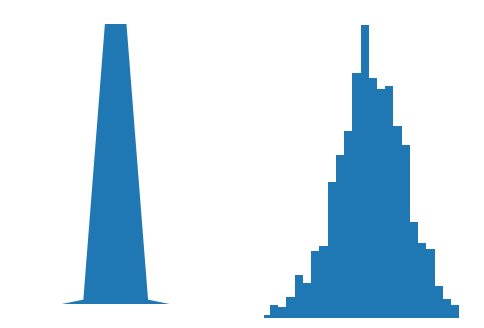

In [18]:
fig, ax = plt.subplots(ncols=2,figsize=(6,4))
ax1 = ax[0]
ax1.fill(x,stats.norm.pdf(x))
ax1.set_axis_off()
ax1.set_xlim(-10,10)
ax2 = ax[1]
ax2.hist(xsample,bins=30)
ax2.set_xlim(-3,3)
ax2.set_axis_off()

ax2.set_position
plt.show()

In [19]:
## sampling distribution of a statistic

In [21]:
loans_income = pd.read_csv(LOANS_INCOME_CSV).squeeze('columns')
loans_income

0         67000
1         52000
2        100000
3         78762
4         37041
          ...  
49995     40000
49996     54000
49997     50000
49998     82000
49999     70000
Name: x, Length: 50000, dtype: int64

In [23]:
sample_data = pd.DataFrame({
    'income':loans_income.sample(1000),
    'type':'data'
    
})
sample_data.head()

,income,type
33798,89000,data
36591,80000,data
36202,37500,data
37792,56000,data
32112,156000,data


In [24]:
sample_mean_05 = pd.DataFrame({
    'income':[loans_income.sample(5).mean() for _ in range(1000)],
    'type':'mean of 5'
})
sample_mean_05.head()

,income,type
0,56200.0,mean of 5
1,45000.0,mean of 5
2,73000.0,mean of 5
3,65200.0,mean of 5
4,93600.0,mean of 5


In [25]:
sample_mean_20 = pd.DataFrame({
    'income':[loans_income.sample(20).mean() for _ in range(1000)],
    'type':'mean of 20'
})
sample_mean_20.head()

,income,type
0,60432.05,mean of 20
1,69336.60,mean of 20
2,72635.50,mean of 20
3,69729.80,mean of 20
4,71015.60,mean of 20


In [26]:
results = pd.concat([sample_data,sample_mean_05,sample_mean_20])
results.head()

,income,type
33798,89000.0,data
36591,80000.0,data
36202,37500.0,data
37792,56000.0,data
32112,156000.0,data


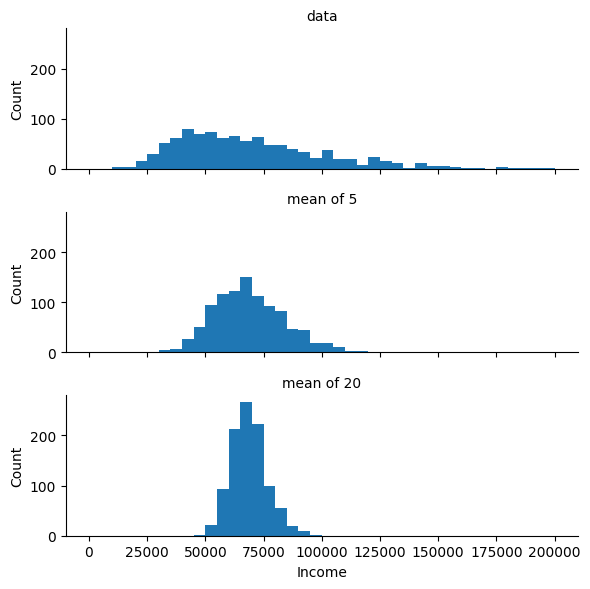

In [28]:
g = sns.FacetGrid(results, col='type', col_wrap=1,height=2,aspect=3)
g.map(plt.hist,'income', range=[0,200000], bins=40)
g.set_axis_labels('Income','Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

In [33]:
## the bootstrap
loans_income

0         67000
1         52000
2        100000
3         78762
4         37041
          ...  
49995     40000
49996     54000
49997     50000
49998     82000
49999     70000
Name: x, Length: 50000, dtype: int64

In [31]:
results = []
for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)
results.head()

0    62000.0
1    62000.0
2    62000.0
3    62000.0
4    62000.0
dtype: float64

In [32]:
sample

9031      85000
34315     46000
7350      30000
27370    116000
9014      32000
          ...  
30758     91000
7098      30000
18833     85000
14734     75000
47272     39000
Name: x, Length: 50000, dtype: int64

In [34]:
print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 62000.0
bias: -87.31100000000151
std. error: 237.0956296868768


In [35]:
## confidence intervals
print(loans_income.mean())

68760.51844


In [37]:
np.random.seed(seed=3)
sample20 = resample(loans_income,n_samples=20,replace=True)
print(sample20.mean())

results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)


64409.5


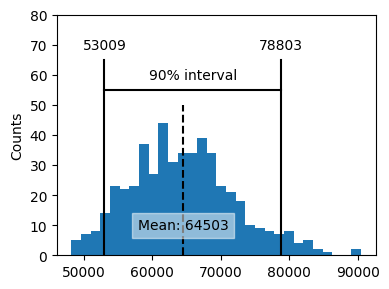

In [38]:
confidence_interval = list(results.quantile([0.05,0.95]))
ax=results.plot.hist(bins=30, figsize=(4,3))
ax.plot(confidence_interval,[55,55], color='black')
for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}', 
            horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()   

In [39]:
confidence_interval

[53009.21000000001, 78802.545]

Text(0, 0.5, 'Counts')

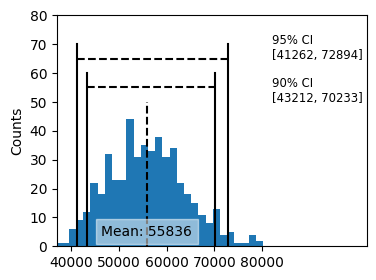

In [40]:
np.random.seed(seed=3)
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)

results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3), color='C1')
ax.plot(confidence_interval, [55, 55], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 60], color='black')
ax.text(82000, 50, 
        f'90% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')

confidence_interval = list(results.quantile([0.025, 0.975]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [65, 65], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 70], color='black')
ax.text(82000, 65, 
        f'95% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')
# ax.text(sum(confidence_interval) / 2, 264, '95 % interval',
#         horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 5, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_xlim(37000, 102000)
ax.set_xticks([40000, 50000, 60000, 70000, 80000])
ax.set_ylabel('Counts')

# plt.tight_layout()
# plt.show()

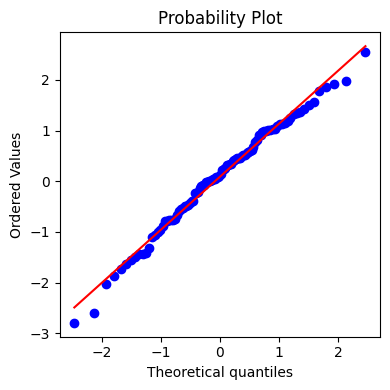

In [41]:
fig, ax = plt.subplots(figsize=(4,4))
norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample,plot=ax)


plt.tight_layout()
plt.show()

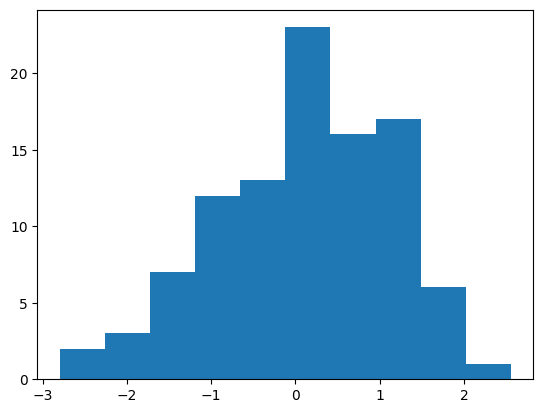

In [44]:
plt.hist(norm_sample)
plt.show()

In [45]:
## long tailed distributions

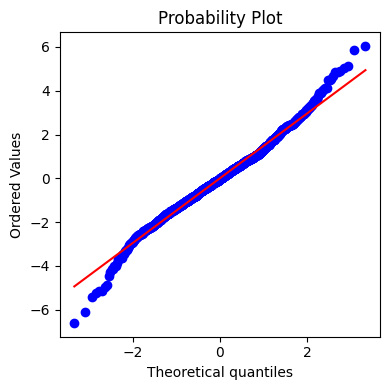

array([ 0.1941524 , -0.28767869, -0.12516315, ..., -0.33897658,
       -0.29747412, -0.38983429])

In [47]:
sp500_px = pd.read_csv(SP500_DATA_CSV)

nflx = sp500_px.NFLX
nflx = np.diff(np.log(nflx[nflx>0]))

fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(nflx, plot=ax)

plt.tight_layout()
plt.show()

nflx

In [50]:
np.diff([2,3,4,5,10])

array([1, 1, 1, 5])

In [51]:
stats.binom.pmf(2,n=5,p=0.1)

0.07289999999999992

In [52]:
stats.binom.cdf(2,n=5,p=0.1)

0.99144

In [53]:
## poisson distributions

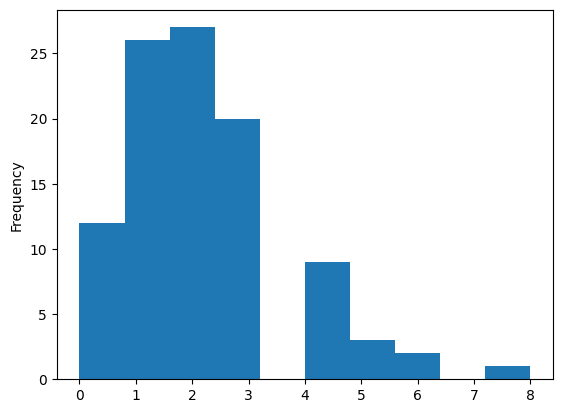

In [55]:
sample = stats.poisson.rvs(2,size=100)
pd.Series(sample).plot.hist()
plt.show()

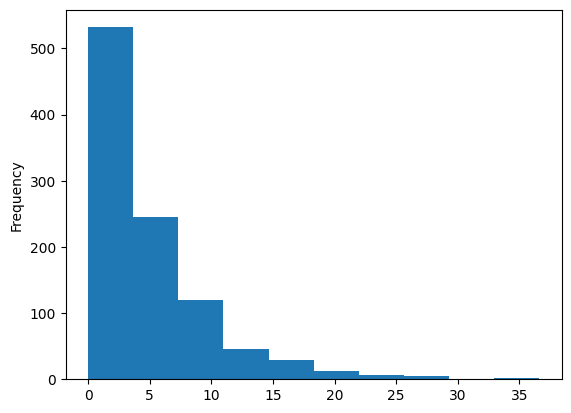

In [56]:
## exponential distrbution

sample = stats.expon.rvs(scale=5, size=1000)
pd.Series(sample).plot.hist()
plt.show()

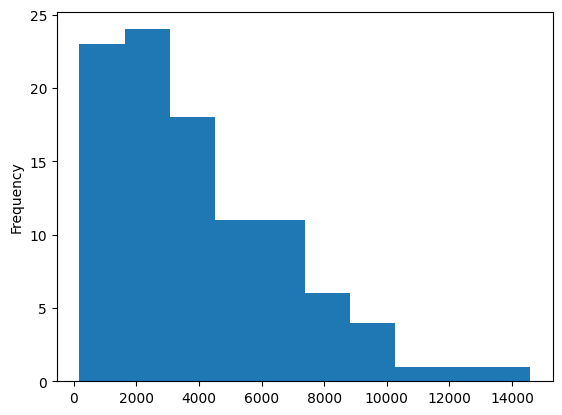

In [58]:
sample = stats.weibull_min.rvs(1.5, scale=5000, size=100)
pd.Series(sample).plot.hist()
plt.show()